<a href="https://colab.research.google.com/github/eilizataissia/QM2/blob/main/NLP_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob
!python -m spacy download en_core_web_sm

!pip install pyLDAvis



In [2]:
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from gensim import corpora
from gensim.models import LdaModel
import nltk
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')


import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/tika/__init__.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages

In [3]:
urls = [
    'https://merics.org/en/analysis/bri-pakistan-chinas-flagship-economic-corridor',
    'https://www.brecorder.com/news/397830',
    'https://cpec.gov.pk/science-technology',
    'https://chinapower.csis.org/china-belt-and-road-initiative/',
    'https://unctad.org/system/files/information-document/BRI-Project_policy-brief-01_en.pdf',
    'https://www.worldbank.org/en/topic/regional-integration/brief/belt-and-road-initiative',
    'https://greenfdc.org/china-belt-and-road-initiative-bri-investment-report-2023/',
    'https://www.sciencedirect.com/science/article/abs/pii/S106297692030171X',
    'https://www.internationalaffairs.org.au/australianoutlook/china-pakistan-and-the-belt-and-road-initiative-10-years-of-the-china-pakistan-economic-corridor/',
    'https://www.brookings.edu/articles/at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor/',
    'https://www.bbc.co.uk/news/world-asia-66981742',
    'https://www.cfr.org/backgrounder/chinas-massive-belt-and-road-initiative',
    'https://www.crisisgroup.org/asia/south-asia/pakistan/297-china-pakistan-economic-corridor-opportunities-and-risks',
    'https://www.icwa.in/show_content.php?lang=1&level=3&ls_id=5103&lid=835',
    'https://www.lowyinstitute.org/the-interpreter/china-s-big-gamble-pakistan-10-year-scorecard-cpec',
    'https://www.eurasiareview.com/08012025-the-transformative-power-of-cpec-oped/',
    'https://moderndiplomacy.eu/2025/01/07/cpec-transformative-power/',
    'https://moderndiplomacy.eu/2025/01/02/10-years-of-cpec-a-decade-of-progress/',
    'https://thediplomat.com/2024/06/pakistan-china-agree-to-upgrade-cpec/',
    'https://www.sciencedirect.com/science/article/abs/pii/S0960148122003494',
    'https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/',
    'https://www.nature.com/articles/s41598-024-81173-9',
    'https://profit.pakistantoday.com.pk/2025/01/07/pakistan-to-revise-power-supply-mechanism-to-cpec-sezs/',
    'https://ieefa.org/resources/ieefa-china-and-pakistans-no-more-coal-power-pledges-dont-hold-scrutiny',
    'https://www.gatewayhouse.in/cpec-pakistan/',
    'https://www.efchina.org/Blog-en/blog-20181213-en',
    'https://journals.scholarpublishing.org/index.php/ASSRJ/article/view/4841/3019',
    'https://www.brecorder.com/news/40341729/gwadar-port-planning-minister-seeks-marketing-templates-packages-for-cost-effective-trade-routes',
    'https://www.dawn.com/news/1850539',
    'https://pmc.ncbi.nlm.nih.gov/articles/PMC9004670/'
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
def scrape_article(url):
  try:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    article_text = ' '.join([p.text for p in paragraphs])
    return article_text

  except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
    return None
  except AttributeError as e:
    print(f"Error parsing HTML: {e}")
    return None

articles = [scrape_article(url) for url in urls]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
  return tokens


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
cleaned_articles = [preprocess_text(article) for article in articles]
dictionary = corpora.Dictionary(cleaned_articles)
corpus = [dictionary.doc2bow(article) for article in cleaned_articles]

lda_model = LdaModel(corpus, id2word=dictionary, num_topics=50, passes=2)

topics = lda_model.print_topics(num_words=50)
for topic in topics:
  print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(24, '0.031*"china" + 0.018*"pakistan" + 0.016*"chinas" + 0.015*"chinese" + 0.014*"economic" + 0.012*"asia" + 0.009*"foreign" + 0.009*"april" + 0.008*"projects" + 0.008*"india" + 0.007*"corridor" + 0.007*"south" + 0.007*"project" + 0.006*"region" + 0.005*"silk" + 0.005*"xi" + 0.005*"development" + 0.005*"relations" + 0.005*"power" + 0.005*"billion" + 0.005*"investment" + 0.005*"road" + 0.005*"ibid" + 0.005*"port" + 0.005*"energy" + 0.004*"also" + 0.004*"international" + 0.004*"aid" + 0.004*"affairs" + 0.004*"us" + 0.004*"policy" + 0.004*"central" + 0.004*"jinping" + 0.004*"made" + 0.004*"maritime" + 0.004*"cit" + 0.004*"would" + 0.004*"mw" + 0.004*"pakistans" + 0.003*"new" + 0.003*"gwadar" + 0.003*"op" + 0.003*"major" + 0.003*"signed" + 0.003*"council" + 0.003*"visit" + 0.003*"times" + 0.003*"trade" + 0.003*"neighbourhood" + 0.003*"cpec"')
(40, '0.035*"road" + 0.033*"belt" + 0.026*"initiative" + 0.017*"trade" + 0.015*"bri" + 0.013*"english" + 0.012*"risks" + 0.011*"published" + 0.011*"

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

all_tokens = [token for article in cleaned_articles for token in article]

stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in all_tokens if token.lower() not in stop_words and token.isalnum()]

fdist = FreqDist(filtered_tokens)

most_common_words = fdist.most_common(20)

for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

nltk.download('averaged_perceptron_tagger_eng')
tagged_tokens = nltk.pos_tag(filtered_tokens)

nouns_verbs = [word for word, pos in tagged_tokens if pos.startswith('N') or pos.startswith('V')]
fdist_nouns_verbs = FreqDist(nouns_verbs)
most_common_nouns_verbs = fdist_nouns_verbs.most_common(20)

for word, frequency in most_common_nouns_verbs:
    print(f"{word}: {frequency}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


energy: 493
china: 258
cpec: 184
projects: 182
pakistan: 176
efficiency: 166
chinese: 145
economic: 143
bri: 137
power: 135
renewable: 133
chinas: 125
development: 114
road: 103
project: 95
infrastructure: 94
billion: 88
countries: 88
belt: 81
initiative: 79
energy: 493
china: 217
projects: 182
efficiency: 166
cpec: 142
power: 135
development: 114
road: 103
pakistan: 102
bri: 99
chinas: 97
infrastructure: 91
project: 90
countries: 88
belt: 74
production: 69
investment: 67
investments: 64
trade: 62
policy: 57


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                  url  sentiment
0   https://merics.org/en/analysis/bri-pakistan-ch...   0.266866
1               https://www.brecorder.com/news/397830   0.280197
2              https://cpec.gov.pk/science-technology   0.000000
3   https://chinapower.csis.org/china-belt-and-roa...   0.000000
4   https://unctad.org/system/files/information-do...   0.000000
5   https://www.worldbank.org/en/topic/regional-in...   0.148515
6   https://greenfdc.org/china-belt-and-road-initi...   0.190034
7   https://www.sciencedirect.com/science/article/...   0.400000
8   https://www.internationalaffairs.org.au/austra...   0.230638
9   https://www.brookings.edu/articles/at-all-cost...   0.106794
10     https://www.bbc.co.uk/news/world-asia-66981742   0.216787
11  https://www.cfr.org/backgrounder/chinas-massiv...   0.206598
12  https://www.crisisgroup.org/asia/south-asia/pa...   0.164286
13  https://www.icwa.in/show_content.php?lang=1&le...   0.196795
14  https://www.lowyinsti

<ipython-input-11-cf451d5416db>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


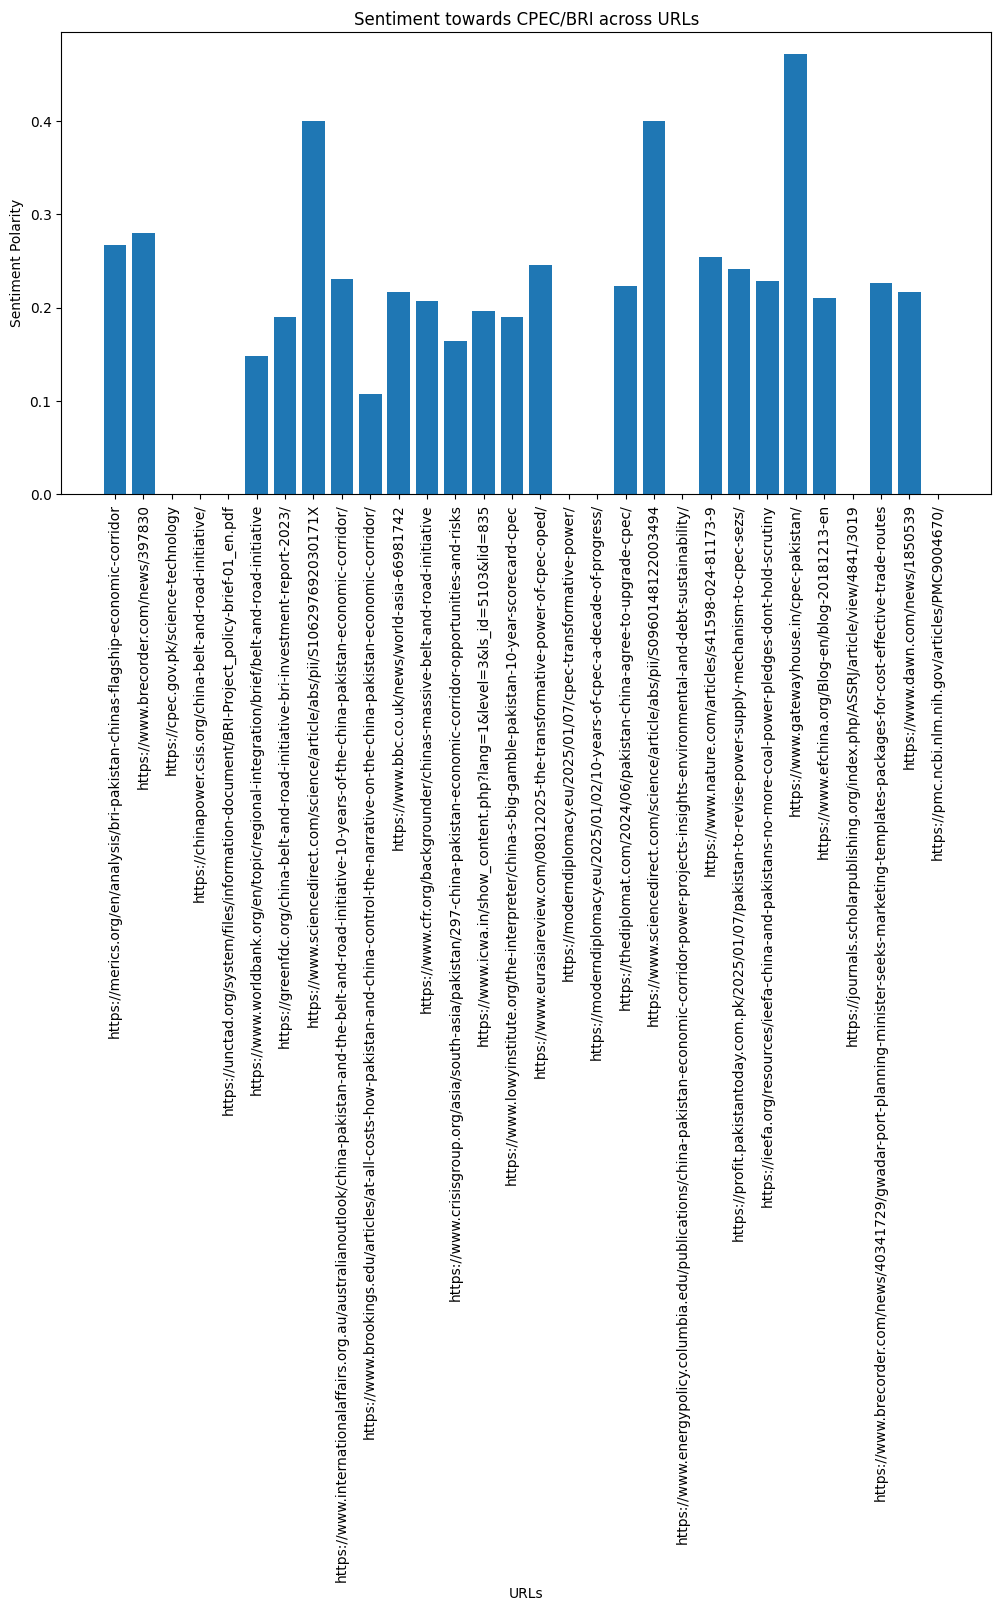

In [11]:
sentiment_scores = []
for url, article in zip(urls, articles):
  doc = nlp(article)
  polarity = doc._.blob.polarity
  subjectivity = doc._.blob.subjectivity
  sentiment = 0.5 * polarity + 0.5 * subjectivity
  sentiment_scores.append({'url': url, 'sentiment': sentiment})


sentiment_df = pd.DataFrame(sentiment_scores)
print(sentiment_df)

plt.figure(figsize=(12, 6))
plt.bar(sentiment_df['url'], sentiment_df['sentiment'])
plt.xticks(rotation=90)
plt.xlabel('URLs')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment towards CPEC/BRI across URLs')
plt.tight_layout()
plt.show()

In [12]:
import numpy as np

sentiments = [item['sentiment'] for item in sentiment_scores]

mean_sentiment = np.mean(sentiments)

print(f"Mean Average Sentiment: {mean_sentiment}")

Mean Average Sentiment: 0.17722950066485024


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
